In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('credit_card_transactions.csv')

In [3]:
df.shape

(25000, 11)

In [4]:
df.head(10)

,transaction_id,customer_id,date,amount,merchant,category,country,is_international,card_type,currency,flagged
0,TXN000001,1844,2024-01-16,196.91,"Maldonado, Ballard and Alvarez",Entertainment,India,0,amex,INR,0
1,TXN000002,2404,2024-02-19,61.06,Young-Carlson,Travel,Singapore,1,Visa,SGD,0
2,TXN000003,1984,2024-02-08,1584.72,"Obrien, Fuller and Keller",dinning,Germany,1,AmEx,EUR,1
3,TXN000004,2994,2024-03-17,25.72,Rodriguez-Kelly,Entertainment,USA,0,Visa,USD,0
4,TXN000005,2725,2024-05-30,262.93,"Mcdonald, Nguyen and Sloan",Travel,India,0,MasterCard,INR,0
5,TXN000006,2786,2024-01-22,422.94,Adams-Flores,dinning,Taiwan,0,MasterCard,TWD,0
6,TXN000007,1205,2024-01-15,129.11,"Bryant, Galvan and Parker",Elec-tronics,Vietnam,0,Master Card,VND,0
7,TXN000008,1873,2024-03-31,204.21,Bell-Dean,NaN,India,0,Visa,INR,0
8,TXN000009,2104,2023-12-30,66.65,"Bradshaw, Cherry and Blackburn",Health,Taiwan,0,AmEx,TWD,0
9,TXN000010,1960,2023-12-27,250.07,"White, Gonzalez and Gibson",Entertainment,USA,0,Visa,USD,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    25000 non-null  object 
 1   customer_id       25000 non-null  int64  
 2   date              24721 non-null  object 
 3   amount            24765 non-null  float64
 4   merchant          25000 non-null  object 
 5   category          21701 non-null  object 
 6   country           25000 non-null  object 
 7   is_international  25000 non-null  int64  
 8   card_type         25000 non-null  object 
 9   currency          25000 non-null  object 
 10  flagged           25000 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 2.1+ MB


In [6]:
# Check for duplicate rows
df.duplicated().sum()

np.int64(0)

In [7]:
# check for missing values
# 1. Count missing values in each column
df.isnull().sum()

transaction_id         0
customer_id            0
date                 279
amount               235
merchant               0
category            3299
country                0
is_international       0
card_type              0
currency               0
flagged                0
dtype: int64

In [8]:
# Count + percentage of missing values
missing = df.isnull().sum().to_frame(name='Missing Count')
missing['Missing %'] = (missing['Missing Count'] / len(df) * 100).round(2)
missing[missing['Missing Count'] > 0]


,Missing Count,Missing %
date,279,1.12
amount,235,0.94
category,3299,13.20


In [9]:
# check unique values
df['category'].unique()

array(['Entertainment', 'Travel', 'dinning', 'Elec-tronics', nan,
       'Health', 'grocerie', 'Travell', 'Dining', 'Utilities', 'Clothing',
       'Electronics', 'Groceries', 'healthcare'], dtype=object)

In [10]:
df['card_type'].unique()

array(['amex', 'Visa', 'AmEx', 'MasterCard', 'Master Card'], dtype=object)

In [11]:
df.describe()


,customer_id,amount,is_international,flagged
count,25000.00000,24765.000000,25000.000000,25000.000000
mean,1999.92972,104.468569,0.204240,0.006440
std,576.96091,192.634819,0.403153,0.079992
min,1000.00000,0.000000,0.000000,0.000000
25%,1498.00000,26.590000,0.000000,0.000000
50%,2002.00000,63.360000,0.000000,0.000000
75%,2503.00000,128.230000,0.000000,0.000000
max,2999.00000,7029.480000,1.000000,1.000000


# Data cleaning

In [12]:
# convert date to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [13]:
# drop rows where amount is missing
df = df.dropna(subset=['amount'])

In [14]:
cutoff = pd.to_datetime('2024-05-31')
df = df[df['date'] <= cutoff]

In [15]:
df['year_month'] = df['date'].dt.to_period('M').astype(str)

In [16]:
# Set boundaries
start_date = pd.to_datetime('2023-12-01')
end_date = pd.to_datetime('2024-05-31')

# Filter in only rows with date in the correct range
df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

In [17]:
df['date'].min(), df['date'].max()

(Timestamp('2023-12-01 00:00:00'), Timestamp('2024-05-31 00:00:00'))

In [18]:
df['year_month'].sort_values().unique()

array(['2023-12', '2024-01', '2024-02', '2024-03', '2024-04', '2024-05'],
      dtype=object)

In [19]:
df['amount'] = df['amount'].round(2)

In [20]:
# Convert to boolean data type
df['is_international'] = df['is_international'].astype(bool)
df['flagged'] = df['flagged'].astype(bool)

In [21]:
# Remove extra spaces and make all lowercase
df['category'] = df['category'].astype(str).str.strip().str.lower()
df['card_type'] = df['card_type'].astype(str).str.strip().str.lower()

In [22]:
# Replace Misspellings and Variants with Correct Labels
category_map = {
    'dinning': 'dining',
    'elec-tronics': 'electronics',
    'travell': 'travel',
    'grocerie': 'groceries',
    'healthcare': 'health',
    'health': 'health',
    '': 'unknown',
    'none': 'unknown',
    'nan': 'unknown'
}

df['category'] = df['category'].replace(category_map)


In [23]:
card_type_map = {
    'visa': 'Visa',
    'master card': 'MasterCard',
    'mastercard': 'MasterCard',
    'amex': 'AmEx',
    'american express': 'AmEx'
}

df['card_type'] = df['card_type'].replace(card_type_map)

In [24]:
# Format as Title Case
df['category'] = df['category'].str.title()


In [25]:
# Create amount_usd Column

exchange_rates = {
    'USD': 1.00,
    'GBP': 1.30,
    'EUR': 1.10,
    'INR': 0.012,
    'SGD': 0.74,
    'JPY': 0.007,
    'TWD': 0.032,
    'VND': 0.000041
}

df['amount_usd'] = df['amount'] * df['currency'].map(exchange_rates)
df['amount_usd'] = df['amount_usd'].round(2)


In [26]:
card_type_map = {
    'visa': 'Visa',
    'master card': 'MasterCard',
    'mastercard': 'MasterCard',
    'amex': 'AmEx',
    'american express': 'AmEx'
}

df['card_type'] = df['card_type'].replace(card_type_map)


# Exploratory Data Analysis (EDA)

## Metrics / KPIs to Track

In [27]:
#  Extract Year-Month from date column
df['year_month'] = df['date'].dt.to_period('M').astype(str)

In [28]:
#  Group by Month and Calculate Total Spending
monthly_spend = df.groupby('year_month')['amount_usd'].sum().reset_index()
print(monthly_spend)

  year_month  amount_usd
0    2023-12   211968.97
1    2024-01   226022.69
2    2024-02   199089.83
3    2024-03   211057.12
4    2024-04   222292.50
5    2024-05   233302.67


In [29]:
# Add Transaction Volume
monthly_txn = df.groupby('year_month').agg(
    total_spend=('amount_usd', 'sum'),
    txn_count=('transaction_id', 'count')
).reset_index()


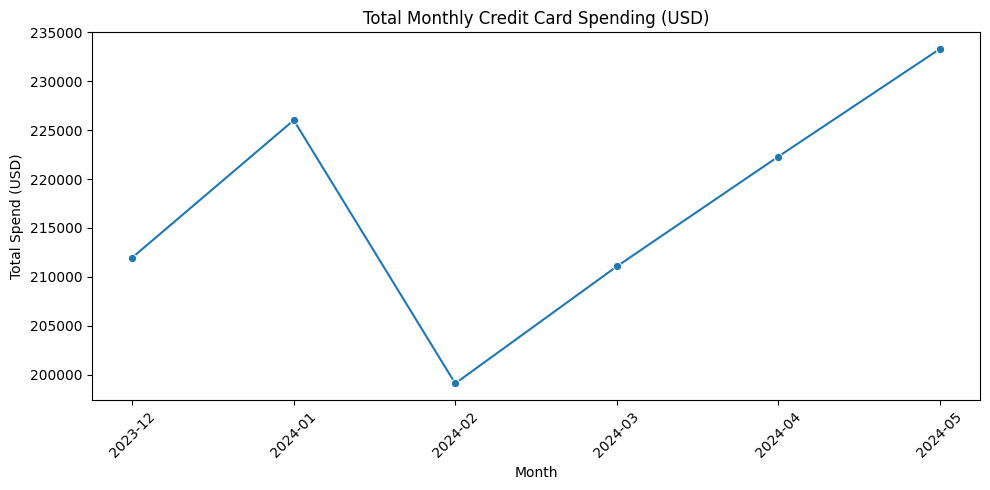

In [30]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_txn, x='year_month', y='total_spend', marker='o')
plt.title('Total Monthly Credit Card Spending (USD)')
plt.xlabel('Month')
plt.ylabel('Total Spend (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Total credit card spending showed a clear upward trend from February to May 2024, increasing by over 17% in just 3 months (from ~$199K in Feb to ~$233K in May).

In [31]:
# Overall average transaction size
avg_txn = df['amount_usd'].mean().round(2)
print(f"Average Transaction Size: ${avg_txn}")

Average Transaction Size: $54.28


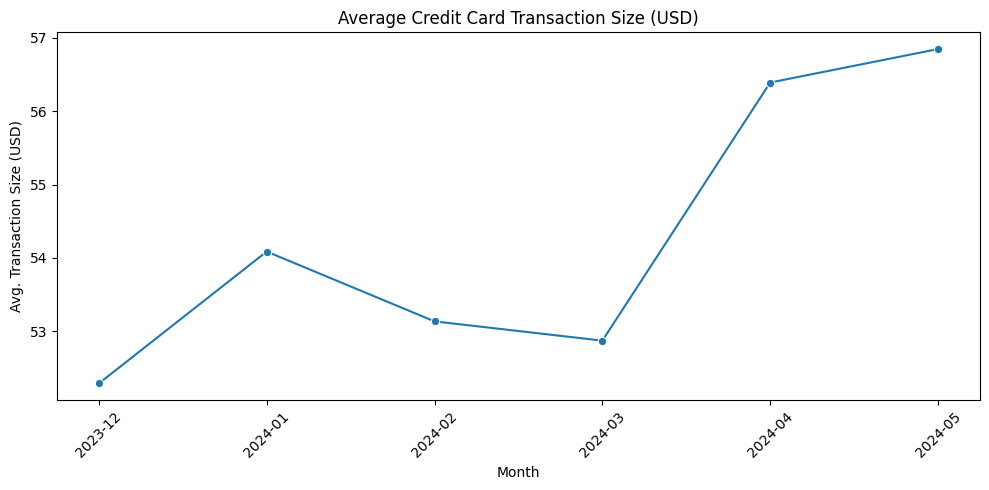

In [32]:
# Monthly average transaction size
avg_monthly = df.groupby('year_month')['amount_usd'].mean().reset_index()

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.lineplot(data=avg_monthly, x='year_month', y='amount_usd', marker='o')
plt.title('Average Credit Card Transaction Size (USD)')
plt.xlabel('Month')
plt.ylabel('Avg. Transaction Size (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
# Top 5 Spenders (by total amount spent in usd)
top_spenders = df.groupby('customer_id')['amount_usd'].sum().nlargest(5).reset_index()
top_spenders.columns = ['customer_id', 'total_spent_usd']
print(top_spenders)

   customer_id  total_spent_usd
0         1097          5832.32
1         1447          5303.44
2         1052          5127.17
3         1553          4721.76
4         1907          4628.75


In [34]:
# Total flagged and percentage
flagged_count = df['flagged'].sum()
flagged_pct = (flagged_count / len(df) * 100).round(2)

print(f"Flagged Transactions: {flagged_count} ({flagged_pct}%)")

Flagged Transactions: 157 (0.65%)


In [35]:
#  International usage %
intl_count = df['is_international'].sum()
intl_pct = (intl_count / len(df) * 100).round(2)

print(f"International Transactions: {intl_count} ({intl_pct}%)")

International Transactions: 4923 (20.5%)


In [36]:
# Spend by Category and Card Type
category_card_spend = df.groupby(['category', 'card_type'])['amount_usd'].sum().reset_index().sort_values(by='amount_usd', ascending=False)
print(category_card_spend.head(10))


       category   card_type  amount_usd
15       Health        AmEx    79667.65
21      Unknown        AmEx    75772.65
18       Travel        AmEx    75225.70
22      Unknown  MasterCard    75005.90
7   Electronics  MasterCard    74560.82
6   Electronics        AmEx    67420.44
3        Dining        AmEx    65803.93
4        Dining  MasterCard    63329.23
16       Health  MasterCard    60677.54
19       Travel  MasterCard    59667.60


## Anomaly Detection

In [37]:
# Compute IQR
Q1 = df['amount_usd'].quantile(0.25) # 25th percentile
Q3 = df['amount_usd'].quantile(0.75) # 75th percentile
IQR = Q3 - Q1                       # Interquartile range (spread of middle 50%)

In [38]:
# Define upper bound (we care about high spenders)
upper_bound = Q3 + 1.5 * IQR             # Anything above this is considered an outlier

In [39]:
 # Flag outliers
df['is_outlier'] = df['amount_usd'] > upper_bound       # Create a new boolean column to flag it

In [40]:
# Count
outlier_count = df['is_outlier'].sum()
print(f"Outlier transactions (above ${upper_bound:.2f}): {outlier_count}")   # Count how many True values

Outlier transactions (above $159.82): 2223


In [41]:
# Top 10 outlier transactions
df[df['is_outlier']].sort_values(by='amount_usd', ascending=False).head(10)

,transaction_id,customer_id,date,amount,merchant,category,country,is_international,card_type,currency,flagged,year_month,amount_usd,is_outlier
13645,TXN013646,1052,2024-05-05,3654.36,Tate LLC,Electronics,UK,False,MasterCard,GBP,True,2024-05,4750.67,True
22952,TXN022953,1553,2023-12-09,4473.00,Hernandez-Marks,Unknown,USA,False,MasterCard,USD,True,2023-12,4473.00,True
16453,TXN016454,1907,2024-01-29,4227.96,"Hodges, Martinez and Price",Utilities,USA,False,Visa,USD,True,2024-01,4227.96,True
8087,TXN008088,1097,2024-02-03,3044.40,"Drake, Thomas and Flores",Electronics,UK,False,Visa,GBP,True,2024-02,3957.72,True
14031,TXN014032,2493,2024-02-06,2797.20,Alvarez LLC,Unknown,UK,False,MasterCard,GBP,True,2024-02,3636.36,True
12013,TXN012014,2277,2024-04-06,2904.72,Hawkins-Mcdonald,Utilities,Germany,False,MasterCard,EUR,True,2024-04,3195.19,True
12483,TXN012484,1583,2024-01-14,2418.96,"Duncan, Casey and Osborn",Health,UK,False,MasterCard,GBP,True,2024-01,3144.65,True
6406,TXN006407,2664,2024-04-03,4131.96,Barnes Inc,Groceries,Singapore,False,Visa,SGD,True,2024-04,3057.65,True
10578,TXN010579,1102,2023-12-16,2317.20,"Green, Sims and Duran",Health,UK,False,AmEx,GBP,True,2023-12,3012.36,True
5244,TXN005245,2421,2024-05-21,2316.72,Rodgers PLC,Health,UK,False,AmEx,GBP,True,2024-05,3011.74,True


In [42]:
# Count of outliers per customer
outlier_by_customer = df[df['is_outlier']].groupby('customer_id')['amount_usd'].count().sort_values(ascending=False).head(10)
print(outlier_by_customer)

customer_id
2856    6
2074    5
1139    5
2610    5
1447    5
1393    5
1520    5
1994    4
1861    4
2816    4
Name: amount_usd, dtype: int64


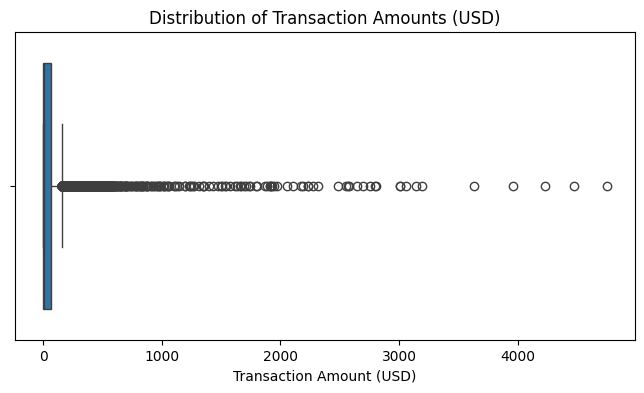

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['amount_usd'])
plt.title('Distribution of Transaction Amounts (USD)')
plt.xlabel('Transaction Amount (USD)')
plt.show()

# Export Cleaned Data to SQLite Database

In [44]:
import sqlite3

# Change this path to wherever you want the file saved
conn = sqlite3.connect('credit_card_cleaned.sqlite')

# Save your cleaned DataFrame to a table
df.to_sql('transactions', conn, if_exists='replace', index=False)

conn.close()


In [45]:
import sqlite3
import pandas as pd

# Connect to your saved database
conn = sqlite3.connect('credit_card_cleaned.sqlite')

# Which users spent the most?
query = """
SELECT
    customer_id,
    ROUND(SUM(amount_usd), 2) AS total_spent_usd
FROM transactions
GROUP BY customer_id
ORDER BY total_spent_usd DESC
LIMIT 10;
"""

top_spenders = pd.read_sql_query(query, conn)
conn.close()
print(top_spenders)



   customer_id  total_spent_usd
0         1097          5832.32
1         1447          5303.44
2         1052          5127.17
3         1553          4721.76
4         1907          4628.75
5         2277          4227.30
6         2493          3843.24
7         1583          3543.32
8         2664          3516.68
9         1102          3430.57


In [46]:
%load_ext sql
%sql sqlite:///credit_card_cleaned.sqlite

In [47]:
#What’s the monthly volume of transactions by country

# Connect to local SQLite file
conn = sqlite3.connect('credit_card_cleaned.sqlite')

# Define SQL query
query = """
SELECT
    strftime('%Y-%m', date) AS year_month,
    country,
    ROUND(SUM(amount_usd), 2) AS total_spent_usd
FROM transactions
GROUP BY year_month, country
ORDER BY year_month, total_spent_usd DESC;
"""

# Run the query and load result into a DataFrame
monthly_country_spend = pd.read_sql_query(query, conn)

# Close connection
conn.close()

# Show the result
monthly_country_spend.head(10)


,year_month,country,total_spent_usd
0,2023-12,UK,67629.24
1,2023-12,USA,57696.96
2,2023-12,Germany,51121.60
3,2023-12,Singapore,33158.38
4,2023-12,Taiwan,1389.09
5,2023-12,India,604.93
6,2023-12,Japan,367.25
7,2023-12,Vietnam,1.52
8,2024-01,UK,69696.75
9,2024-01,Germany,56637.90


In [48]:
# How much do users spend by card type?
query = """
SELECT
    card_type,
    ROUND(SUM(amount_usd), 2) AS total_spent_usd
FROM transactions
GROUP BY card_type
ORDER BY total_spent_usd DESC;
"""

card_type_spend = pd.read_sql_query(query, sqlite3.connect('credit_card_cleaned.sqlite'))
card_type_spend


,card_type,total_spent_usd
0,AmEx,532497.08
1,MasterCard,503708.29
2,Visa,267528.41


In [49]:
# What % of transactions are flagged as risky?
query = """
SELECT
    SUM(CASE WHEN flagged = 1 THEN 1 ELSE 0 END) * 1.0 / COUNT(*) * 100 AS percent_flagged
FROM transactions;
"""

percent_flagged = pd.read_sql_query(query, sqlite3.connect('credit_card_cleaned.sqlite'))
percent_flagged


,percent_flagged
0,0.653676


In [50]:
# How much of our usage is international?
query = """
SELECT
    SUM(CASE WHEN is_international = 1 THEN 1 ELSE 0 END) * 1.0 / COUNT(*) * 100 AS percent_international
FROM transactions;
"""

percent_international = pd.read_sql_query(query, sqlite3.connect('credit_card_cleaned.sqlite'))
percent_international


,percent_international
0,20.497127


In [51]:
# Export cleaned DataFrame to CSV
df.to_csv('credit_card_cleaned.csv', index=False)